In [ ]:
import opensmile 
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import svm
from pprint import pprint
base_path = "/home/ubuntu/"

## Read saved dataframes to generate features and labels

In [ ]:
data_path_lj = '/home/ubuntu/testing-code/opensmile-feature-importance/smile_dfs/0310-lj_experimental_data_v1.csv'
df = pd.read_csv(data_path_lj)

In [ ]:
df.head()

,id,file,type,fake,duration(seconds),audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,LJ032-0137,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,ElevenLabs,0,7.762,2.529597,0.608866,0.765319,0.343702,0.589645,...,10.773912,0.657822,2.936347,2.935397,20.000000,0.609994,129.240130,64.158455,130.97571,60.847908
1,LJ038-0165,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,ElevenLabs,0,8.656,2.406416,0.005841,0.695093,0.295922,0.514596,...,8.458103,0.531263,2.910538,2.911863,-20.000000,0.650057,125.028530,58.838596,115.42761,55.276188
2,LJ044-0203,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,ElevenLabs,0,5.150,2.695161,0.249012,0.175889,0.375376,0.674925,...,11.555664,0.663116,2.731076,2.731820,-20.000000,0.479881,126.260170,54.306473,109.07703,62.240750
3,LJ003-0044,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,ElevenLabs,0,3.199,2.287197,0.528846,0.996795,0.478625,0.801715,...,11.162925,0.497092,3.827386,3.820832,19.997963,0.526514,155.382830,77.223274,146.11166,88.627940
4,LJ036-0116,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,ElevenLabs,0,2.340,2.027513,0.181416,0.513274,0.277241,0.572403,...,6.160469,0.462080,2.797420,2.774368,19.579084,0.638266,99.164055,44.689617,123.44574,49.456890


In [ ]:
y = df['fake'].copy()
X = df.drop(columns=['id', 'file', 'type','fake']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#standard scaling of input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#robust scaling of input data
scaler_ro = RobustScaler()
X_train_scaled_ro = scaler_ro.fit_transform(X_train)
X_test_scaled_ro = scaler_ro.transform(X_test)

In [ ]:
#min-max scaling of data
scaler_mm = MinMaxScaler()
X_train_scaled_mm = scaler_mm.fit_transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

## Experiment 1: Random Forest Classifier based Feature Importance

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 50, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10, 100]

# Method of selecting samples for training each tree
bootstrap = [True, False]

#criterion 
criterion = ['gini', 'entropy', 'log_loss']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 5, 10, 100],
 'min_samples_split': [2, 5, 10, 50, 100],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 1000, 
                               cv = 10, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [ ]:
rf_random.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=300; total time=  38.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=100, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=100; total time=  18.4s
[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 4.2min
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=500; total time= 1.4min
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time= 5.3min
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=100, min_samples_split=5, 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10, 100],
                                        'min_samples_split': [2, 5, 10, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
#hyperparameter selection
n_estimators = 500 #default=100
criterion = "gini" #{“gini”, “entropy”, “log_loss”}, default=”gini”
max_depth = 8 #default=None 
min_samples_split = 2 #default=2 The minimum number of samples required to split an internal node
min_samples_leaf = 1 #default=1 The minimum number of samples required to be at a leaf node.
min_weight_fraction_leaf = 0.0 #The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
max_features = "log2" #default="sqrt" The number of features to consider when looking for the best split:
max_leaf_nodes = None #Grow trees with max_leaf_nodes in best-first fashion.
min_impurity_decrease = 0.0 #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
bootstrap = True #default = True Whether bootstrap samples are used when building trees.
oob_score = True #default = False Whether to use out-of-bag samples to estimate the generalization score.
n_jobs = -1 #default=None -1 means all processors
random_state = None #deafult=None controls randomness of bootstrapping
verbose = 0 
warm_start = False #deafult = False When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
max_samples = None #If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [ ]:
#define model
base_model = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    criterion=criterion,
                                    max_features=max_features,
                                    bootstrap=bootstrap,
                                    oob_score=oob_score,
                                    n_jobs=n_jobs)

base_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       n_jobs=-1, oob_score=True)

In [ ]:
base_preds = base_model.predict(X_test_scaled)
base_accuracy = accuracy_score(y_test,base_preds)

In [ ]:
base_accuracy*100

79.21875

In [ ]:
best_random = rf_random.best_estimator_
random_preds = best_random.predict(X_test_scaled)
random_accuracy = accuracy_score(y_test, random_preds)

In [ ]:
random_accuracy*100

86.8359375

In [ ]:
#get feature importance 
importance_base = base_model.feature_importances_
importance_random = best_random.feature_importances_

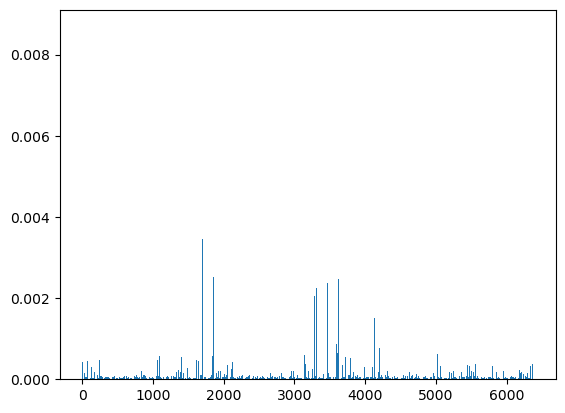

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance_base))], importance_base)
plt.show()

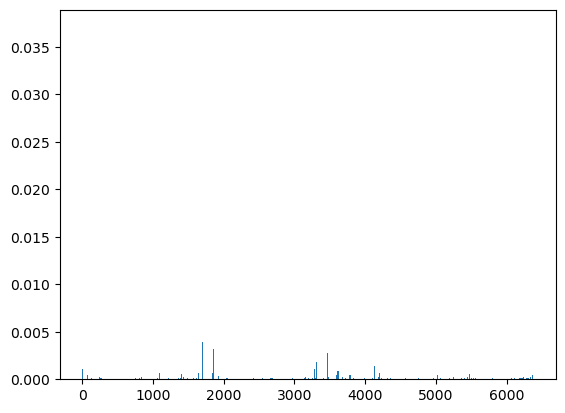

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance_random))], importance_random)
plt.show()

In [ ]:
importance_base

array([4.75160644e-05, 2.94410357e-04, 8.57051155e-06, ...,
       9.30183573e-05, 6.22534438e-04, 1.01343523e-04])

In [ ]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_random)[-50:]
tresh=importance_random[top_k_features[0]]
# summarize feature importance
for i,v in enumerate(importance_random):
    if v >= tresh:
        print('Feature: %s, Score: %.5f' % (features[i],v))

Feature: pcm_zcr_sma_percentile99.0, Score: 0.00326
Feature: pcm_fftMag_spectralSlope_sma_percentile99.0, Score: 0.00327
Feature: mfcc_sma[5]_lpc0, Score: 0.00420
Feature: mfcc_sma[5]_lpc1, Score: 0.00342
Feature: mfcc_sma[6]_lpc0, Score: 0.00392
Feature: mfcc_sma[6]_lpc1, Score: 0.00448
Feature: mfcc_sma[7]_lpc0, Score: 0.00427
Feature: mfcc_sma[7]_lpc1, Score: 0.00301
Feature: mfcc_sma[8]_lpc0, Score: 0.00323
Feature: mfcc_sma[8]_lpc1, Score: 0.00299
Feature: mfcc_sma[10]_lpc0, Score: 0.00310
Feature: mfcc_sma[10]_lpc1, Score: 0.00296
Feature: mfcc_sma[11]_lpc0, Score: 0.00318
Feature: mfcc_sma[11]_lpc1, Score: 0.00318
Feature: mfcc_sma[12]_lpgain, Score: 0.00466
Feature: mfcc_sma[12]_lpc1, Score: 0.00311
Feature: mfcc_sma[14]_lpc1, Score: 0.00278
Feature: pcm_fftMag_spectralFlux_sma_de_stddev, Score: 0.00292
Feature: mfcc_sma_de[3]_lpc2, Score: 0.00272
Feature: mfcc_sma_de[5]_lpgain, Score: 0.00283
Feature: mfcc_sma_de[5]_lpc0, Score: 0.00292
Feature: mfcc_sma_de[5]_lpc1, Score: 0.0

In [ ]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_base)[-50:]
tresh=importance_base[top_k_features[0]]
# summarize feature importance
for i,v in enumerate(importance_base):
    if v >= tresh:
        print('Feature: %s, Score: %.5f' % (features[i],v))

Feature: pcm_RMSenergy_sma_minPos, Score: 0.00273
Feature: mfcc_sma[3]_lpc1, Score: 0.00287
Feature: mfcc_sma[5]_lpc1, Score: 0.00342
Feature: mfcc_sma[6]_lpc0, Score: 0.00345
Feature: mfcc_sma[6]_lpc1, Score: 0.00368
Feature: mfcc_sma[7]_lpgain, Score: 0.00268
Feature: mfcc_sma[7]_lpc0, Score: 0.00348
Feature: mfcc_sma[7]_lpc1, Score: 0.00470
Feature: mfcc_sma[8]_lpc0, Score: 0.00272
Feature: mfcc_sma[8]_lpc1, Score: 0.00317
Feature: mfcc_sma[9]_lpgain, Score: 0.00350
Feature: mfcc_sma[9]_lpc0, Score: 0.00488
Feature: mfcc_sma[11]_lpc0, Score: 0.00251
Feature: mfcc_sma[12]_lpc0, Score: 0.00338
Feature: mfcc_sma[13]_lpgain, Score: 0.00337
Feature: mfcc_sma[13]_lpc0, Score: 0.00289
Feature: mfcc_sma[13]_lpc1, Score: 0.00351
Feature: mfcc_sma[14]_lpgain, Score: 0.00314
Feature: mfcc_sma[14]_lpc0, Score: 0.00309
Feature: mfcc_sma_de[3]_lpc1, Score: 0.00258
Feature: mfcc_sma_de[4]_lpc1, Score: 0.00257
Feature: mfcc_sma_de[5]_lpc0, Score: 0.00476
Feature: mfcc_sma_de[5]_lpc2, Score: 0.00345

In [ ]:
len(features), len(importance_base)

(6374, 6374)

In [ ]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_base)[-50:]
tresh=importance_base[top_k_features[0]]
feats = []
scores = []
for feat, imp in zip(features,importance_base):
    if imp>=tresh:
        feats.append(feat)
        scores.append(imp)
sorted([x+', '+str(y) for y, x in sorted(zip(scores, feats), reverse=True)]  )    

['jitterDDP_sma_flatness, 0.006151849265618862',
 'jitterDDP_sma_percentile1.0, 0.008674820552536882',
 'jitterDDP_sma_quartile1, 0.0076627571543999365',
 'jitterDDP_sma_quartile2, 0.00475749217018914',
 'jitterLocal_sma_percentile1.0, 0.008133309743949569',
 'jitterLocal_sma_quartile1, 0.002779711617804029',
 'mfcc_sma[11]_lpc0, 0.0025133819884292025',
 'mfcc_sma[12]_lpc0, 0.0033836089221836673',
 'mfcc_sma[13]_lpc0, 0.0028914105508598014',
 'mfcc_sma[13]_lpc1, 0.0035105113368448784',
 'mfcc_sma[13]_lpgain, 0.0033679981999950705',
 'mfcc_sma[14]_lpc0, 0.0030877718702344444',
 'mfcc_sma[14]_lpgain, 0.0031367716896395555',
 'mfcc_sma[3]_lpc1, 0.002870190967843662',
 'mfcc_sma[5]_lpc1, 0.0034205999340551924',
 'mfcc_sma[6]_lpc0, 0.003445172656894923',
 'mfcc_sma[6]_lpc1, 0.00368191439167261',
 'mfcc_sma[7]_lpc0, 0.0034775953657380436',
 'mfcc_sma[7]_lpc1, 0.004700796144542636',
 'mfcc_sma[7]_lpgain, 0.002681572545536479',
 'mfcc_sma[8]_lpc0, 0.002715774840965633',
 'mfcc_sma[8]_lpc1, 0.0

In [ ]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_random)[-50:]
tresh=importance_random[top_k_features[0]]
feats = []
scores = []
for feat, imp in zip(features,importance_random):
    if imp>=tresh:
        feats.append(feat)
        scores.append(imp)
sorted([x+', '+str(y) for y, x in sorted(zip(scores, feats), reverse=True)] )     

['jitterDDP_sma_flatness, 0.023424178784070812',
 'jitterDDP_sma_iqr1-2, 0.0031481081457349533',
 'jitterDDP_sma_percentile1.0, 0.03269224003808169',
 'jitterDDP_sma_quartile1, 0.03705361878025819',
 'jitterDDP_sma_quartile2, 0.018230928904843024',
 'jitterLocal_sma_flatness, 0.006537503095079193',
 'jitterLocal_sma_percentile1.0, 0.025554627660380635',
 'jitterLocal_sma_quartile1, 0.007702980273260568',
 'logHNR_sma_posamean, 0.002690005022163042',
 'mfcc_sma[10]_lpc0, 0.0031008048833229287',
 'mfcc_sma[10]_lpc1, 0.002958782629063808',
 'mfcc_sma[11]_lpc0, 0.003178727302402982',
 'mfcc_sma[11]_lpc1, 0.003179861666213443',
 'mfcc_sma[12]_lpc1, 0.0031114124716410635',
 'mfcc_sma[12]_lpgain, 0.004660220573027717',
 'mfcc_sma[14]_lpc1, 0.0027795100597434556',
 'mfcc_sma[5]_lpc0, 0.0041955014309044665',
 'mfcc_sma[5]_lpc1, 0.003418894084515326',
 'mfcc_sma[6]_lpc0, 0.003924459731969166',
 'mfcc_sma[6]_lpc1, 0.004478272099708001',
 'mfcc_sma[7]_lpc0, 0.0042678479344527825',
 'mfcc_sma[7]_lp